In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MLP_manual.mlp import MLP, MLP2, ACTIVATION_FUNCTIONS

## Learning to multiplications numbers from 0 to 1

In [2]:
mlp_mul = MLP(2, [3, 2], 1) 

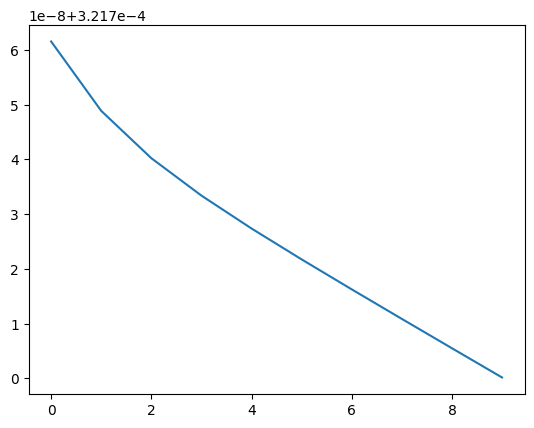

In [3]:
for _ in range(500):
    n_samples = 1000
    X = np.random.rand(2, n_samples)
    Y = X[0] * X[1]
    Y.shape = (-1, n_samples)
    mlp_mul.fit(X, Y, 50, 3, show = False)
mlp_mul.fit(X, Y, 10, 0.5, show = True)

In [4]:
m_samples = 5
X_test = np.random.rand(2, m_samples)
Y_test = X_test[0] * X_test[1]
Y_test.shape = (-1, m_samples)
print("X is: \n", X_test)
print('What mlp thinks about multiplication \n', mlp_mul.forward_propagat(X_test))
print('error is \n', Y_test - mlp_mul.forward_propagat(X_test))

X is: 
 [[0.39121866 0.71314572 0.46951428 0.90145428 0.17188395]
 [0.17725227 0.16711176 0.1935376  0.64256388 0.69696483]]
What mlp thinks about multiplication 
 [[0.07416518 0.11669061 0.0938771  0.60269735 0.11136134]]
error is 
 [[-0.00482078  0.00248443 -0.00300844 -0.02345538  0.00843572]]


In [5]:
mlp2_mul = MLP2([(2, ), (3, 'sigmoid'), (2, 'sigmoid'), (1, 'sigmoid')])

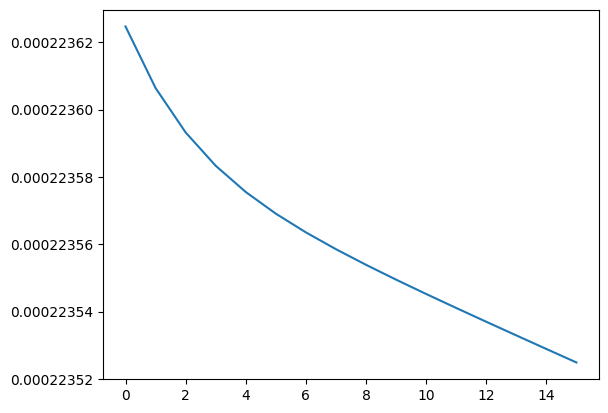

In [6]:
for _ in range(500):
    n_samples = 1000
    X = np.random.rand(n_samples, 2)
    Y = X[:, 0] * X[:, 1]
    Y.shape = (n_samples, -1)
    mlp2_mul.fit(X, Y, 50, 3, batch_size=1000, show_los = False)
mlp2_mul.fit(X, Y, 15, 0.3, batch_size=1000)

In [7]:
m_samples = 5
X_test = np.random.rand(m_samples, 2)
Y_test = X_test[:, 0] * X_test[:, 1]
Y_test.shape = (m_samples, -1)
print("X is: \n", X_test)
print('What mlp thinks about multiplication \n', mlp2_mul.forward_propagat(X_test))
print('error is \n', Y_test - mlp2_mul.forward_propagat(X_test))

X is: 
 [[0.3179621  0.3409796 ]
 [0.46660858 0.69823635]
 [0.78302588 0.97524972]
 [0.85705447 0.46329426]
 [0.25923437 0.06654969]]
What mlp thinks about multiplication 
 [[0.10622373]
 [0.32292751]
 [0.75284406]
 [0.39975713]
 [0.02732466]]
error is 
 [[ 0.00219486]
 [ 0.00287556]
 [ 0.01080171]
 [-0.00268871]
 [-0.01007269]]


## here is digit recognition mlp

In [8]:
from get_dataset import DigitExample, show_array_as_image, jpg2data

In [9]:
X, Y = jpg2data(5000)
X_test, Y_test = jpg2data(500, False)

In [10]:
X = X.astype(float)/2550
X_test = X_test.astype(float)/2550

In [11]:
## for train
n_samples = X.shape[0]
print('n_samples = ', n_samples)
indexes = np.arange(0, n_samples, 1)
np.random.shuffle(indexes)
X = X[indexes, :]
Y = Y[indexes, :]
## for test
m_samples = X_test.shape[0]
indexes = np.arange(0, m_samples, 1)
np.random.shuffle(indexes)
X_test = X_test[indexes, :]
Y_test = Y_test[indexes, :]

n_samples =  50000


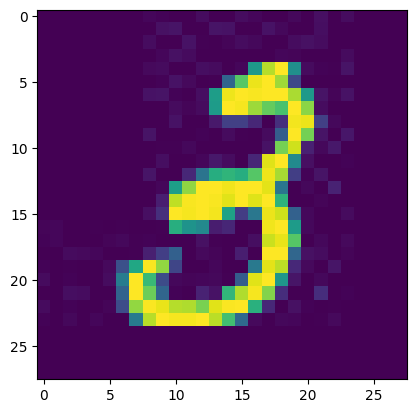

In [12]:
i = 2
show_array_as_image(X[i,:].reshape(28, 28))

In [13]:
mlp_digit = MLP(784, [15, 15], 10)

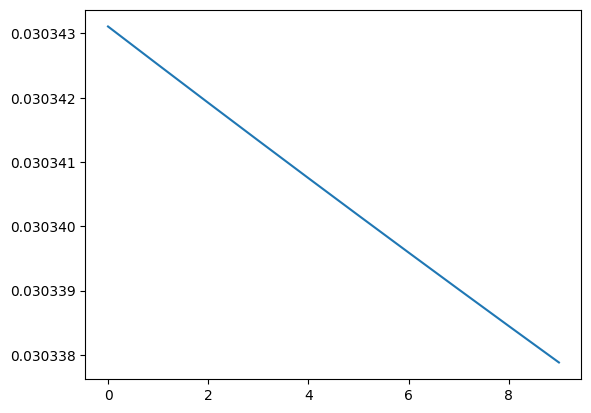

In [14]:
batch_size = 100
n_batches = n_samples // batch_size
for _ in range(15):
    for i in range(n_batches):
        X_certain = X[i*batch_size: (i+1)*batch_size:, :].T
        Y_certain = Y[i*batch_size: (i+1)*batch_size:, :].T
        mlp_digit.fit(X_certain, Y_certain, 25, 3, show = False)
mlp_digit.fit(X_certain, Y_certain, 10, 0.3, show = True)

What thinks about it human:  7
What thinks about it MLP:  7


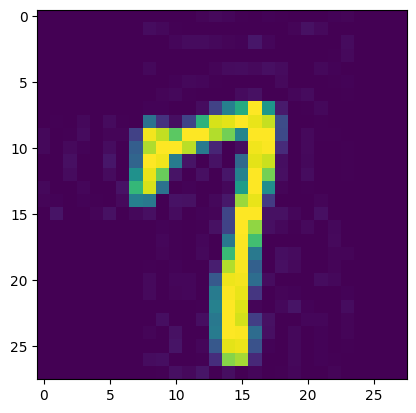

In [15]:
i = 450
show_array_as_image(X_test[i,:].reshape(28, 28))
print("What thinks about it human: ", np.argmax(Y_test[i,:]))
print("What thinks about it MLP: ", np.argmax(mlp_digit.forward_propagat(X_test[i,:].T)))

What thinks about it human:  9
What thinks about it MLP:  9


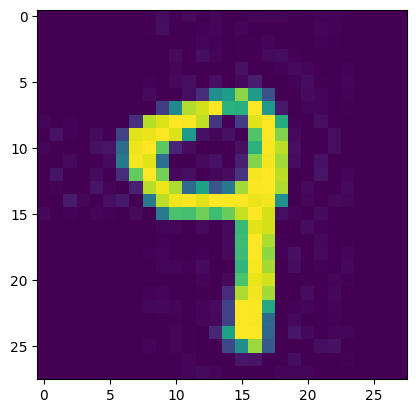

In [16]:
i = 4150
show_array_as_image(X_test[i,:].reshape(28, 28))
print("What thinks about it human: ", np.argmax(Y_test[i,:]))
print("What thinks about it MLP: ", np.argmax(mlp_digit.forward_propagat(X_test[i,:].T)))

In [17]:
mlp2_digit = MLP2([(784, ), (15, 'sigmoid'), (10, 'id')], 'softmax_negative_log_likelihood')

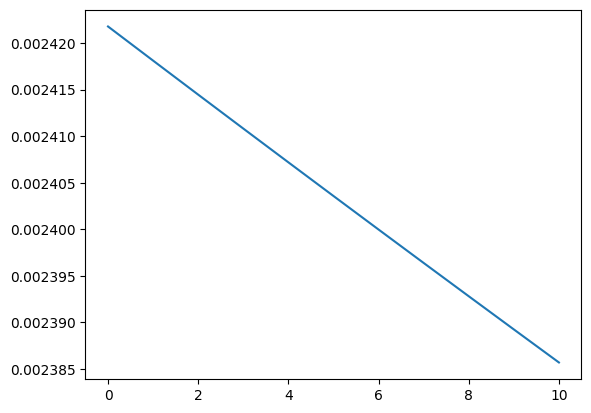

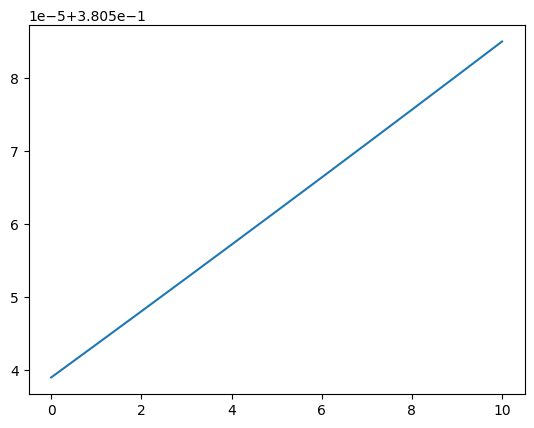

In [18]:
batch_size = 100
n_batches = n_samples // batch_size
for _ in range(10):
    for i in range(n_batches):
        X_certain = X[i*batch_size: (i+1)*batch_size:, :]
        Y_certain = Y[i*batch_size: (i+1)*batch_size:, :]
        mlp2_digit.fit(X_certain, Y_certain, 25, 5, show_los = False)
mlp2_digit.fit(X_certain, Y_certain, 10, 0.3, show_los = True, Y_test = Y_test, X_test = X_test)

What thinks about it human:  3
What thinks about it MLP:  3
[[2.00367197e-20 3.01965654e-21 1.56021125e-15 9.99999999e-01
  1.89279862e-17 6.26944338e-11 1.25480388e-27 4.35930001e-18
  8.79059172e-10 3.70777283e-11]]


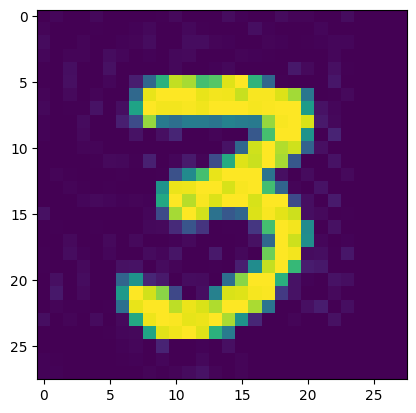

In [19]:
i = 8
show_array_as_image(X_test[i,:].reshape(28, 28))
print("What thinks about it human: ", np.argmax(Y_test[i,:]))
print("What thinks about it MLP: ", np.argmax(mlp2_digit.forward_propagat(X_test[i,:].reshape(1, 784))))
print(ACTIVATION_FUNCTIONS['softmax'][0]((mlp2_digit.forward_propagat(X_test[i,:].reshape(1, 784)))))

What thinks about it human:  1
What thinks about it MLP:  1
[[6.47662737e-16 9.99997149e-01 1.31945481e-08 1.52675574e-06
  1.19214173e-13 2.18076097e-10 3.47912962e-14 6.77293865e-08
  1.24280431e-06 1.13947635e-13]]


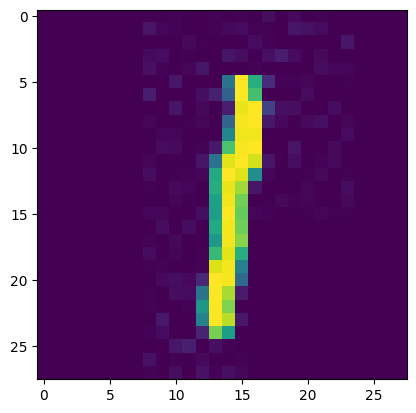

In [20]:
i = 108
show_array_as_image(X_test[i,:].reshape(28, 28))
print("What thinks about it human: ", np.argmax(Y_test[i,:]))
print("What thinks about it MLP: ", np.argmax(mlp2_digit.forward_propagat(X_test[i,:].reshape(1, 784))))
print(ACTIVATION_FUNCTIONS['softmax'][0]((mlp2_digit.forward_propagat(X_test[i,:].reshape(1, 784)))))